In [1]:
import networkx as nx # Lib for create graphs
import numpy as np # Lib to control array
import pandas as pd

from networkx.drawing.nx_pydot import graphviz_layout # Lib for plot hierarchical tree
import matplotlib.pyplot as plt # Lib to plot imagens

import collections # Lib to count values

# import math # Lib to use for math calculus (like log)

## Parameters for analysis

In [2]:
K_max = 3 # The degree of node root (and others nodes too except the leaves)
P_max = 5 # How deep is the tree (nodes after the root)
t = 5 # Steps in the tree (define how many nodes will make after the root)

## Creating the graph

In [3]:
def add_k_nodes(G, node, K_max):
#     print(f'Add vizinhos de {node}')
    while len(list(G.neighbors(node))) < K_max:
        global GLOBAL_NODES
        G.add_node(GLOBAL_NODES)
        G.add_edge(node, GLOBAL_NODES)
        GLOBAL_NODES+=1

In [4]:
def add_nodes(G, node, P_max, d_size):
    if (P_max != d_size) and (P_max > 0):
        add_k_nodes(G, node, K_max)
        d_size+=1
        if d_size < P_max:
            for neig in list(G.neighbors(node)):
                add_nodes(G, neig, P_max, d_size)

In [5]:
def create_graph(G, K, P):
    '''
    G: Graph to add nodes and edges
    
    K: Max of neighbors of each nodes (except leafs od the tree)
    
    P: Size of the tree
    '''
    node = 0
    
    global GLOBAL_NODES
    global K_max
    global P_max
    
    K_max = K
    P_max = P
    GLOBAL_NODES = 1
    
    if P_max > 0:
        G.add_node(node)
        add_k_nodes(G, node, K_max)
        d_size = 1

        for neig in G.neighbors(node):
            add_nodes(G, neig, P_max, d_size)
        
    return G

In [6]:
G = create_graph(nx.Graph(), K_max, P_max)

In [7]:
if nx.is_tree(G):
    print('This Graph is a Tree =D')
else:
    print('This Graph is not a Tree =( ')

This Graph is a Tree =D


## Plot Graph

In [8]:
def plot_tree(G):
    pos = graphviz_layout(G, prog="twopi")
    nx.draw(G, pos, with_labels = True)

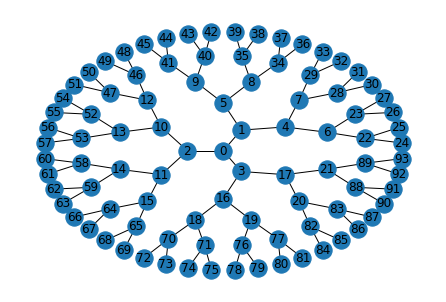

In [9]:
plot_tree(G)

## (a) number of nodes

In [10]:
def average_degree(G):
    '''
    G: A graph
    
    This function calculate de average dregee for the garph G, and return this value round to UP
    '''
    total_deg = sum([G.degree(n) for n in G.nodes()]) # Sum of all degrees
    avg_degree =  total_deg  * 1/ G.number_of_nodes() # Total of degree * 1 / total de nodes (like a formula)
    avg_degree = round(avg_degree + 0.5) # Round the value to up
    
    return avg_degree

In [11]:
def node_up_distance(t, avg_degree, count=0, k=K_max):
    '''
    G: A graph
    
    t: Steps to reachable
    
    count: Interne counter to recursive calls
    
    avg_degree: The Average dregee ''<k>' of G.
    
    k: The degree ok root node or degree of the tree
    '''
    
    global total
    if t == 0:
        print('None node is reachable')
        return

    if count == 0:
        total = k
    else:
        total = total*avg_degree
    count+=1
    
    if t == count:
        return total
    else:
        node_up_distance(t, avg_degree, count, k)
        
    return total

In [12]:
t=5
avg_degree = average_degree(G)
total_exactly = node_up_distance(t, avg_degree)
print(f'Is possible find exactly {total_exactly} nodes in {t} steps')

Is possible find exactly 48 nodes in 5 steps


## (b) most nodes in t steps

In [13]:
def reachable_count(steps, count_steps=0, mult=1, k=K_max):
    if steps > 1:
        global total
        count_steps+=1

        new_mult = (mult*(k-1))+1
        
        total = k*new_mult

        if count_steps == steps-1:
            return total
        else:
            reachable_count(steps, count_steps, new_mult, k)
    else:
        if steps == 0:
            total = 0
        else:
            total = k
        
    return total + 1

In [14]:
# t = 5 # Steps
total = reachable_count(t)

print(f'Is possible find {total} nodes in {t} steps')

Is possible find 94 nodes in 5 steps


## (c) Degree distribution

In [15]:
def plot_degree_probability(G):
    '''
    This function count how many times each degree apears on the graph
    and calculate the probability to a node has to get this dregee
    
    G: graph to find and plot hte degree distribution
    '''
    
    deg = [G.degree(n) for n in G.nodes()] # Find the degree of nodes
    dict_deg_distribution = collections.Counter(deg) # Count how many times each degree apears
    
    list_prob_degree = [] # List with probability of each degree
    for deg_dist in dict_deg_distribution:
        list_prob_degree.append(dict_deg_distribution[deg_dist]/len(deg))
    
    # Ploting the distribution
    plt.bar(list(dict_deg_distribution.keys()), list_prob_degree, 0.35)
    plt.title('Degree probability distribution of the graph')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    
    return list_prob_degree

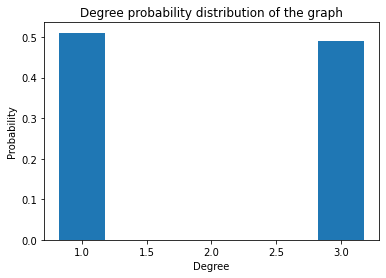

In [16]:
prob_degree = plot_degree_probability(G)

In [17]:
print(f'The probability to a node has degree 1 is {round(prob_degree[0],2)} and {round(prob_degree[1],2)} to degree 3')

The probability to a node has degree 1 is 0.49 and 0.51 to degree 3


## (d) Max diameter by P and K

In [18]:
def get_dmax_from_p(P):
    return P*2

In [19]:
print(f'Diamente of G by networkx is {nx.diameter(G)}')

Diamente of G by networkx is 10


In [20]:
print(f'Diamenter of G considering the P value is P*2, for P = {P_max} the diamenter is {get_dmax_from_p(P_max)}')

Diamenter of G considering the P value is P*2, for P = 5 the diamenter is 10


Comparing the value of The biggest short path between two nodes (result of networkx) and a formula considering only P value, we can got the same result.

## (e) Max diameter by N

In [21]:
# Recursive function to acess all neighbors to the path has the 'length' defined in 'path_counter'
def recursive_visit(G, neighbors, node, length, paths, path=[]):
    path=path+[node]
    if len(path) == length:
        paths.append(path)
    else:
        for neig in neighbors:
            if neig not in path:
                recursive_visit(G, list(G.neighbors(neig)), neig, length, paths, path)
            else:
                paths.append(path)

In [22]:
# Main function to call recursion function
def path_counter(G, paths, length):
    for node in G.nodes:
        recursive_visit(G, list(G.neighbors(node)), node, length, paths, path=[])
    return paths

In [23]:
G_paths=[] # List with paths in the graph
G_paths = path_counter(G, G_paths, G.number_of_nodes())

In [24]:
# Get the bigest shortest path (considering the number of nodes)
biggest_shortest_path = max([len(path_list) for path_list in G_paths])

In [25]:
print(f'The d_max of the graph is {biggest_shortest_path - 1}, '+ 
      f'you can obtain this value counting the nodes (N) in the biggest short path - 1')

The d_max of the graph is 10, you can obtain this value counting the nodes (N) in the biggest short path - 1


In [26]:
print(f'Diamente of G by networkx is {nx.diameter(G)}')

Diamente of G by networkx is 10


Counting the number of nodes in biggest shortest path - 1 and using the library we can obtain same values

## (f) small-world property

In [27]:
# Lsit with values to analys
list_of_n = []
list_of_dmax = []

for p in range(1, 15+1): # Loop to geet values of N and d_max to the family of the graph

    list_of_dmax.append(get_dmax_from_p(p)) # Get the diameter of the graph
    list_of_n.append(reachable_count(p, k=K_max)) # Get the total of nodes sof the graph

In [28]:
# Ploting the values
for count in range(len(list_of_dmax)):
    print(f'P= {count+1} | K= {K_max} ' +
          f'| N= {list_of_n[count]} | d_max= {list_of_dmax[count]} | log(N)= {np.log10(list_of_n[count])}')

    if list_of_dmax[count] >= np.log10(list_of_n[count]):
        print(f'It is small')
    else:
        print(f'Not small')

P= 1 | K= 3 | N= 4 | d_max= 2 | log(N)= 0.6020599913279624
It is small
P= 2 | K= 3 | N= 9 | d_max= 4 | log(N)= 0.9542425094393249
It is small
P= 3 | K= 3 | N= 22 | d_max= 6 | log(N)= 1.3424226808222062
It is small
P= 4 | K= 3 | N= 46 | d_max= 8 | log(N)= 1.662757831681574
It is small
P= 5 | K= 3 | N= 94 | d_max= 10 | log(N)= 1.9731278535996986
It is small
P= 6 | K= 3 | N= 190 | d_max= 12 | log(N)= 2.278753600952829
It is small
P= 7 | K= 3 | N= 382 | d_max= 14 | log(N)= 2.582063362911709
It is small
P= 8 | K= 3 | N= 766 | d_max= 16 | log(N)= 2.884228769632604
It is small
P= 9 | K= 3 | N= 1534 | d_max= 18 | log(N)= 3.185825359612962
It is small
P= 10 | K= 3 | N= 3070 | d_max= 20 | log(N)= 3.4871383754771865
It is small
P= 11 | K= 3 | N= 6142 | d_max= 22 | log(N)= 3.78830981210705
It is small
P= 12 | K= 3 | N= 12286 | d_max= 24 | log(N)= 4.089410510983544
It is small
P= 13 | K= 3 | N= 24574 | d_max= 26 | log(N)= 4.390475853937815
It is small
P= 14 | K= 3 | N= 49150 | d_max= 28 | log(N)= 4

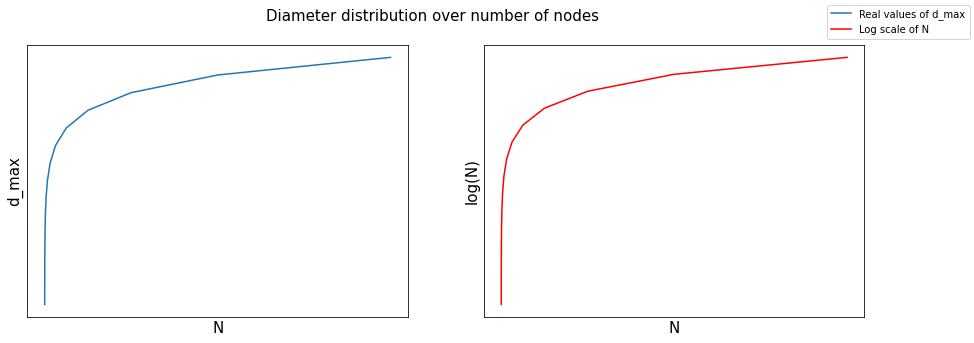

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Diameter distribution over number of nodes', size=15)

ax1.plot(list_of_n, np.array(list_of_dmax), label='Real values of d_max')
ax1.set_xlabel('N', size=15)
ax1.set_ylabel('d_max', size=15)

ax1.set_xticks([])
ax1.set_yticks([])

# ax2.plot(list_of_n, np.log(list_of_dmax),'r', label='ln values')
ax2.plot((list_of_n), np.log10(list_of_n),'r', label='Log scale of N')
ax2.set_xlabel('N', size=15)
ax2.set_ylabel('log(N)', size=15)

ax2.set_xticks([])
ax2.set_yticks([])

fig.legend()

The values of d_max increses in same format that log(N), therefore the network has the property of small-world